## Exploratory Data Analysis

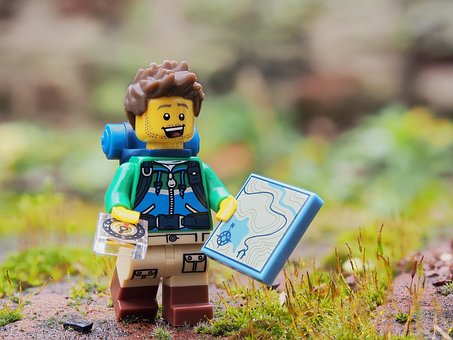

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_pickle("./unemp.pkl")

The data consists of 308 instances, which correspond to all portuguese municipalities. In total there are 67 featues extracted of which "Unemployment_Rate" represents the target variable.

In [4]:
df.shape

(308, 67)

In [26]:
# bin the target variable
df["unemp_categ"] = pd.cut(df['Unemployment_Rate'], 3)

In [9]:
df.loc[:,"Unemployment_Rate"].sort_values().head()

Municipality
Oleiros             0.051
Lajes das Flores    0.053
Calheta [R.A.A.]    0.062
Corvo               0.063
Madalena            0.065
Name: Unemployment_Rate, dtype: float64

In [10]:
df.loc[:,"Unemployment_Rate"].sort_values(ascending=False).head()

Municipality
Mourão                        0.229
Ponte de Sor                  0.209
Serpa                         0.205
Cinfães                       0.200
Vila Real de Santo António    0.199
Name: Unemployment_Rate, dtype: float64

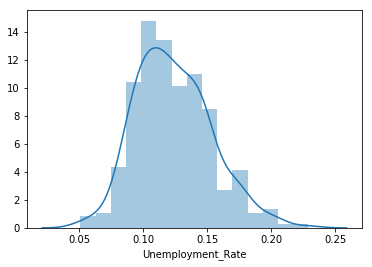

In [12]:
sns.distplot(df["Unemployment_Rate"])

In [13]:
df["Unemployment_Rate"].describe()

count    308.000000
mean       0.123870
std        0.029507
min        0.051000
25%        0.101000
50%        0.121000
75%        0.143000
max        0.229000
Name: Unemployment_Rate, dtype: float64

In [15]:
df.describe()

,Unemployment_Rate,unemp_15 - 24,unemp_25 - 34,unemp_35 - 44,unemp_45 - 54,unemp_55 - 64,unemp_65 or more,no_female,first_female,second_female,...,Young-age dependency ratio,enterprises density,labour productivity,BE,CDS-PP,PCP-PEV,PPD/PSD,PS,x,y
count,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,...,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000
mean,0.123870,0.196361,0.250591,0.220318,0.208447,0.123914,0.000369,0.011667,0.186021,0.122125,...,0.215289,32.577273,16150.051948,0.043750,0.111919,0.080448,0.430695,0.289558,39.615116,-9.638810
std,0.029507,0.039439,0.036287,0.028334,0.032555,0.038473,0.000798,0.010285,0.056831,0.038428,...,0.029653,106.823062,9462.612133,0.020616,0.033254,0.084022,0.116037,0.068056,1.816245,4.918027
min,0.051000,0.101660,0.167015,0.062500,0.104396,0.000000,0.000000,0.000000,0.064103,0.000000,...,0.129000,0.500000,5318.400000,0.005000,0.039000,0.010000,0.138000,0.058000,32.661089,-31.178197
25%,0.101000,0.172317,0.229067,0.204391,0.191375,0.106056,0.000000,0.005812,0.148128,0.093725,...,0.195000,2.675000,11708.450000,0.027000,0.089000,0.026000,0.353000,0.249000,38.718052,-8.750589
50%,0.121000,0.190419,0.246430,0.222890,0.208255,0.125243,0.000000,0.010094,0.173586,0.113485,...,0.214000,6.450000,13877.400000,0.041000,0.109000,0.043500,0.446000,0.292000,39.815294,-8.291156
75%,0.143000,0.210753,0.269430,0.238294,0.227135,0.143650,0.000454,0.015234,0.212984,0.147403,...,0.234000,17.225000,18200.325000,0.059000,0.134000,0.098000,0.514250,0.329250,41.009755,-7.739707
max,0.229000,0.360334,0.500000,0.290698,0.324711,0.318681,0.006270,0.094737,0.426856,0.252577,...,0.342000,1143.400000,119614.500000,0.103000,0.238000,0.446000,0.683000,0.521000,42.114454,-6.271231


### Analysis of "Unemployment Shares per Age Group"

The data consists of shares of unemployed people. Meaning if a municipality has 12.3 in unemp_15 - 24 it means, that of the unemployed people 12.3% are in an age range between 15 and 24. 

In [28]:
unemp_data = ["Unemployment_Rate","unemp_15 - 24" ,"unemp_25 - 34" ,"unemp_35 - 44" ,"unemp_45 - 54" ,"unemp_55 - 64" ,"unemp_65 or more"]
unemp_categ = ["unemp_categ","unemp_15 - 24" ,"unemp_25 - 34" ,"unemp_35 - 44" ,"unemp_45 - 54" ,"unemp_55 - 64" ,"unemp_65 or more"]

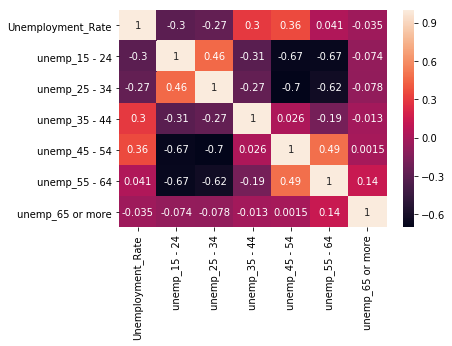

In [25]:
sns.heatmap(df.loc[:, unemp_data].corr(), annot=True)

All variables are highly correlated to each other. This is expected and makes only sense. For the ML ground data, we'll just select one variable of this chunk. Since 45-54 seems to have the highest correlation and the most explanatory power (based on gut feeling) we'll chose this one.

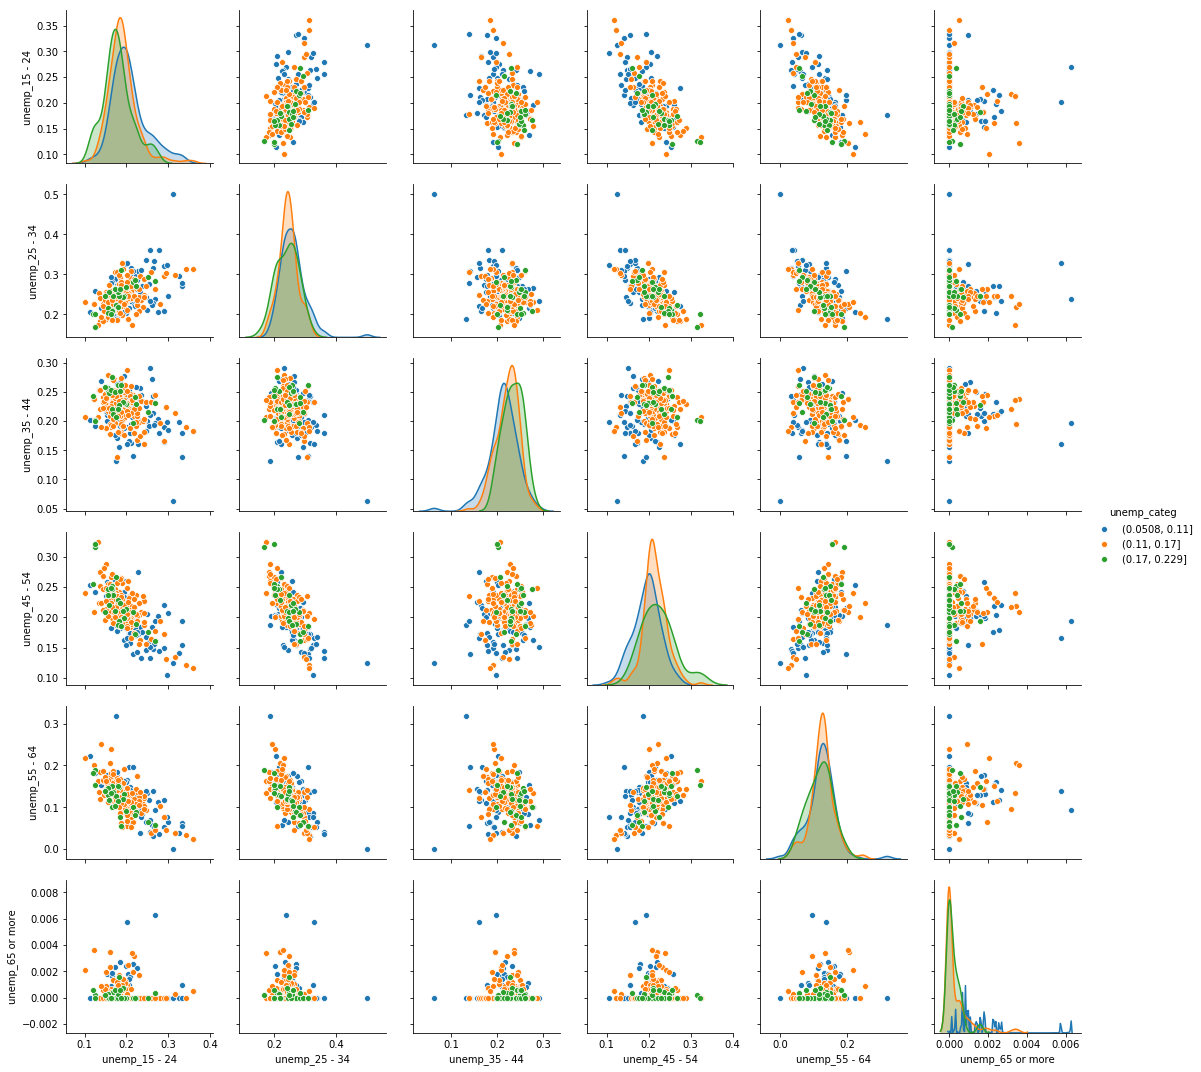

In [30]:
sns.pairplot(df.loc[:, unemp_categ], hue="unemp_categ")

### Analysis of "Unemployment Shares per Education Degree" for females

These variables explain the share of education degrees for unemployed female people.

In [32]:
edu_female = ['Unemployment_Rate', 'no_female','first_female', 'second_female', 'third_female', 'upper_female',
               'middle_female', 'higher_female']
edu_female_categ = ['unemp_categ', 'no_female','first_female', 'second_female', 'third_female', 'upper_female',
               'middle_female', 'higher_female']

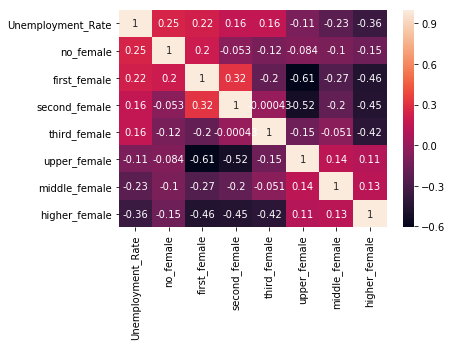

In [33]:
sns.heatmap(df.loc[:, edu_female].corr(), annot=True)

Same reasoning as above mentioned, we'll chose higher_female.
The following pairgrid also suggests, that higher_female is the only varibale which reveal a slight tendency in the sense, that the higher the share of unemployed females with superior education yield a lower unemployment rate.

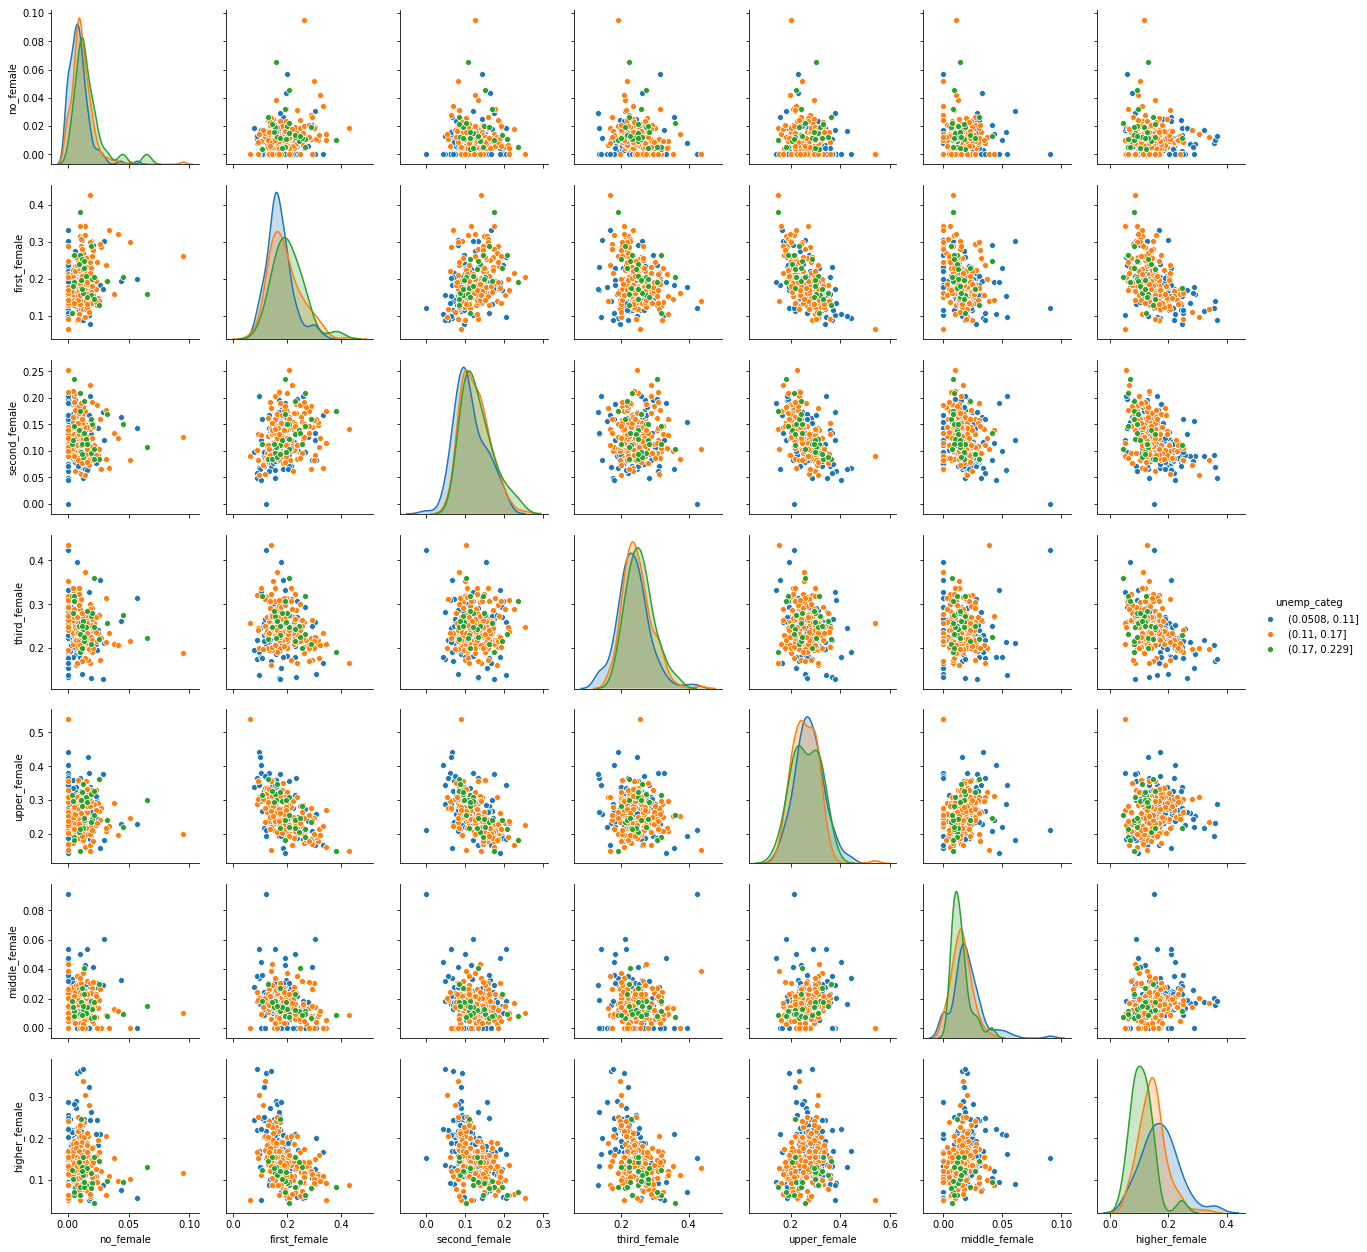

In [34]:
sns.pairplot(df.loc[:, edu_female_categ], hue="unemp_categ")

### Analysis of "Unemployment Shares per Education Degree" for males

These variables explain the share of education degrees for unemployed male people.

In [37]:
edu_male = ['Unemployment_Rate', 'no_male', 'first_male',
       'second_male', 'third_male', 'upper_male', 'middle_male', 'higher_male']
edu_male_categ = ['unemp_categ', 'no_male', 'first_male',
       'second_male', 'third_male', 'upper_male', 'middle_male', 'higher_male']

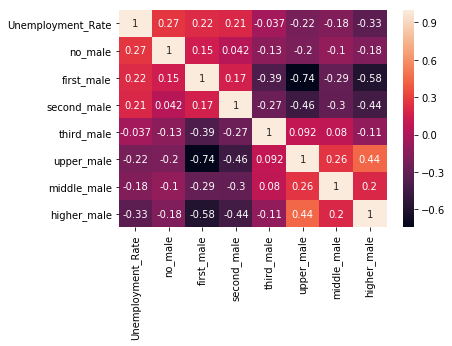

In [38]:
sns.heatmap(df.loc[:, edu_male].corr(), annot=True)

To maintain some variety in the data, we'll choose no_male. The share of unemployed male people, who do not have an education degree.

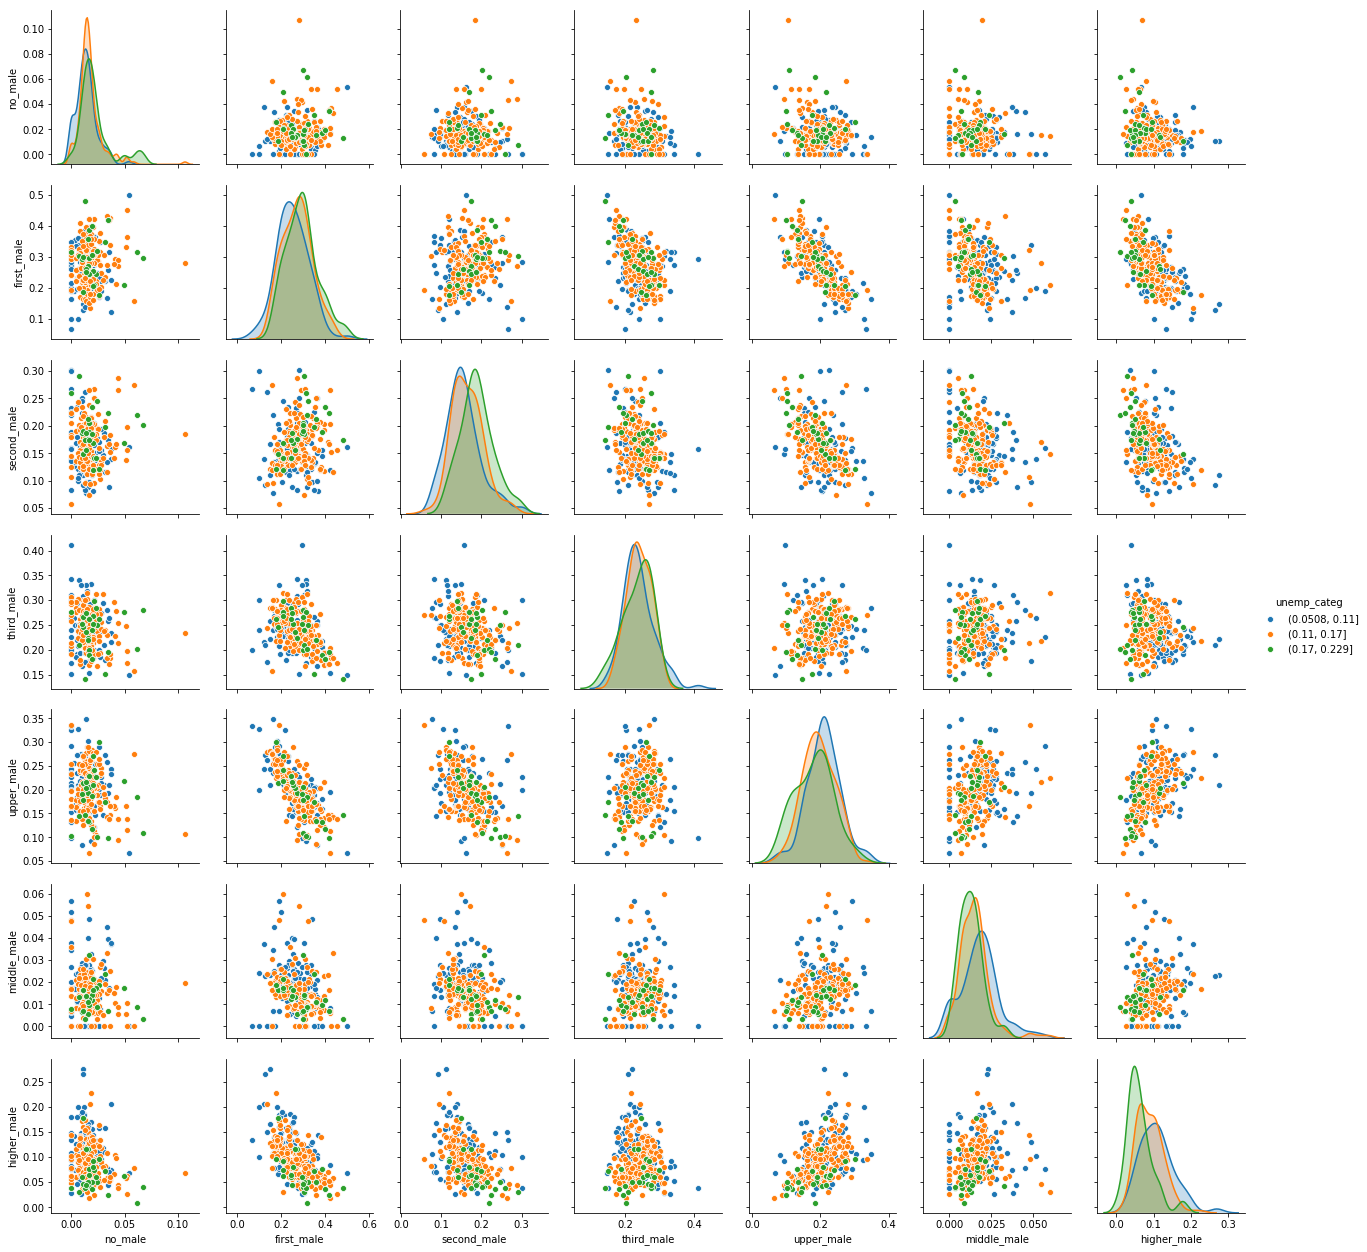

In [40]:
sns.pairplot(df.loc[:, edu_male_categ], hue="unemp_categ")

### Analysis of "Unemployment Shares per Type"

These variables explain the share of the unemployment type for females. Saying if it is the first job hunt or the seek for a new job.

/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


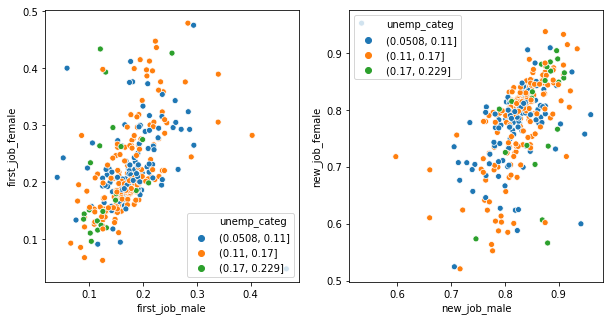

In [63]:
fig, ax =plt.subplots(1,2,figsize=(10, 5))
sns.scatterplot(x="first_job_male", y='first_job_female', data=df, hue='unemp_categ', ax=ax[0])
sns.scatterplot(x="new_job_male", y='new_job_female', data=df, hue='unemp_categ', ax=ax[1])
fig.show()

/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


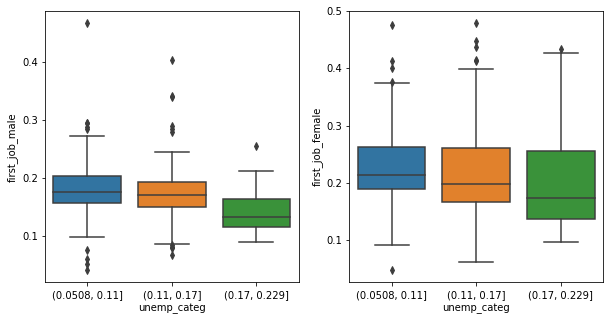

In [64]:
fig, ax =plt.subplots(1,2, figsize=(10, 5))
sns.boxplot(x="unemp_categ",y="first_job_male",data=df, ax=ax[0])
sns.boxplot(x="unemp_categ",y="first_job_female",data=df, ax=ax[1])
fig.show()

These variables seem to be absolutely irrelevant. There's no distinction possible. Remove them.

### Analysis of Average Wage per Education 

These variables show the average wage per education of a municiaplity population.

In [71]:
edu = ['Unemployment_Rate', 'Less 1st cycle', '1st cycle', '2nd cycle', '3rd cycle',
       'upper', 'Higher']
edu_categ = ['unemp_categ', 'Less 1st cycle', '1st cycle', '2nd cycle', '3rd cycle',
       'upper', 'Higher']

In [72]:
# renameing for graphical purposes
df = df.rename(index=str, columns={"Upper-secondary and post-secondary non-tertiary": "upper"})

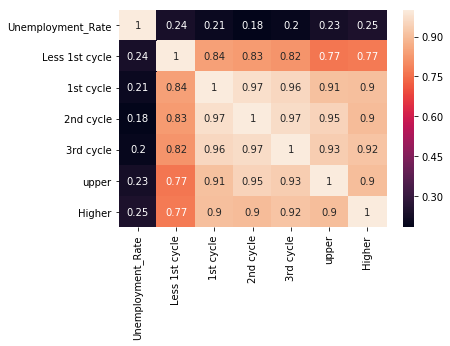

In [73]:
sns.heatmap(df_edu.loc[:, edu].corr(), annot=True)

All of it is very correlated to the target variable. This seems a bit odd. Also there are 24 missing values, which correspond to 7.8% of all the data. Imputing doesn't make sense, hence the data should be dropped.

In [80]:
df_edu.loc[df_edu["Less 1st cycle"]<100, edu].count()[0]/df_edu.shape[0]

0.07792207792207792

### Analysis of Average Wage per Position + the overall avg Wage

These variables show the average wage per position of a municiaplity population.

In [83]:
wage_ = ['Unemployment_Rate', 'Senior Officials', 'Middle-Level Personnel',
       'Supervisors, Foremen and Team Leaders', 'Highly-skilled workers',
       'Skilled workers', 'Semi-skilled workers', 'Unskilled workers',
       'Understudies and apprentices', 'avg_wage']
wage_categ = ['unemp_categ','Senior Officials', 'Middle-Level Personnel',
       'Supervisors, Foremen and Team Leaders', 'Highly-skilled workers',
       'Skilled workers', 'Semi-skilled workers', 'Unskilled workers',
       'Understudies and apprentices', 'avg_wage']

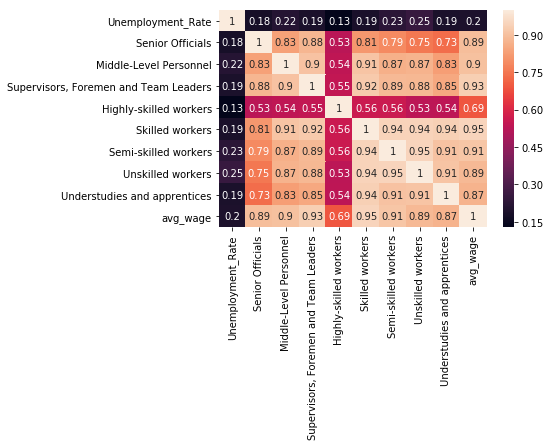

In [84]:
sns.heatmap(df.loc[:, wage_].corr(), annot=True)

In [86]:
df.loc[:, wage_categ].describe()

,Senior Officials,Middle-Level Personnel,"Supervisors, Foremen and Team Leaders",Highly-skilled workers,Skilled workers,Semi-skilled workers,Unskilled workers,Understudies and apprentices,avg_wage
count,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000
mean,1558.114935,1358.721429,1144.802273,1109.587662,768.854221,632.080844,584.792208,579.414610,824.814286
std,621.396476,439.222784,370.877678,558.226995,220.751580,176.875289,158.733047,161.606959,261.662455
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1269.675000,1238.025000,1023.850000,1020.925000,742.275000,618.525000,582.575000,575.450000,761.300000
50%,1531.450000,1407.550000,1186.350000,1107.850000,799.750000,655.850000,612.650000,602.550000,829.050000
75%,1895.625000,1565.200000,1339.250000,1208.600000,863.025000,707.550000,646.450000,633.975000,929.475000
max,3594.500000,2860.300000,2257.100000,8662.500000,1582.300000,1275.800000,832.400000,1235.700000,1721.200000


In [ ]:
wage_sector_ = ['Unemployment_Rate', 'Agriculture, farming of animals, hunting, agroforestry and fishing',
       'Industry, construction, energy and water', 'Manufacturing',
       'Construction']
wage_sector_categ = ['unemp_categ','Agriculture, farming of animals, hunting, agroforestry and fishing',
       'Industry, construction, energy and water', 'Manufacturing',
       'Construction']

In [27]:
df.columns

Index(['Unemployment_Rate', 'unemp_15 - 24', 'unemp_25 - 34', 'unemp_35 - 44',
       'unemp_45 - 54', 'unemp_55 - 64', 'unemp_65 or more', 'no_female',
       'first_female', 'second_female', 'third_female', 'upper_female',
       'middle_female', 'higher_female', 'no_male', 'first_male',
       'second_male', 'third_male', 'upper_male', 'middle_male', 'higher_male',
       'first_job_female', 'new_job_female', 'first_job_male', 'new_job_male',
       'Less 1st cycle', '1st cycle', '2nd cycle', '3rd cycle',
       'Upper-secondary and post-secondary non-tertiary', 'Higher',
       'Senior Officials', 'Middle-Level Personnel',
       'Supervisors, Foremen and Team Leaders', 'Highly-skilled workers',
       'Skilled workers', 'Semi-skilled workers', 'Unskilled workers',
       'Understudies and apprentices', 'avg_wage',
       'Agriculture, farming of animals, hunting, agroforestry and fishing',
       'Industry, construction, energy and water', 'Manufacturing',
       'Construction', '